### SVM Voice Classification
1) Read the dataset<br>
2) Remove/handle null values (if any)<br>
3) Depict percentage distribution of label on a pie chart<br>
4) Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%<br>
5) Apply Support Vector Classifier on train data with different kernels and generate predictions on test data<br>
6) Also generate confusion_matrix and classification report for each of them<br>
7) Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy
for linear, rbf and poly kernels separately<br>
8) Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
9) Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
10) Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart<br>
a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]<br>
b) gamma_range = [0.01,0.02,0.03,0.04,0.05]<br>
11) Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart<br>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('D:\PYTHON ALL/voice.csv')

In [7]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [8]:
d1=df['label'].value_counts()

### Depict percentage distribution of label on a pie chart 

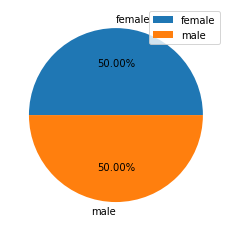

In [9]:
plt.pie(d1,labels=d1.index,autopct="%.2f%%")
plt.legend()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

### Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%

In [12]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


### Apply Support Vector Classifier on train data with different kernels and generate predictions on test data 
### Also generate confusion_matrix and classification report for each of them

In [15]:
from sklearn.svm import SVC,SVR 
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
kernel=['linear','rbf','poly']

In [17]:
for i in kernel:
    model=SVC(kernel=i)
    model.fit(x_train,y_train)
    print(f'With {i} kernal the accuracy score is {model.score(x_test,y_test)}')
    y_pred=model.predict(x_test)
    print(f'For {i} kernal Confusion matrix is\n {confusion_matrix(y_pred,y_test)}')
    print(f'For {i} kernal Classification report is\n {classification_report(y_pred,y_test)}')

With linear kernal the accuracy score is 0.9258675078864353
For linear kernal Confusion matrix is
 [[268   7]
 [ 40 319]]
For linear kernal Classification report is
               precision    recall  f1-score   support

      female       0.87      0.97      0.92       275
        male       0.98      0.89      0.93       359

    accuracy                           0.93       634
   macro avg       0.92      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

With rbf kernal the accuracy score is 0.6798107255520505
For rbf kernal Confusion matrix is
 [[183  78]
 [125 248]]
For rbf kernal Classification report is
               precision    recall  f1-score   support

      female       0.59      0.70      0.64       261
        male       0.76      0.66      0.71       373

    accuracy                           0.68       634
   macro avg       0.68      0.68      0.68       634
weighted avg       0.69      0.68      0.68       634

With poly kernal the ac

###  Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy for linear, rbf and poly kernels separately

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [19]:
stf=StratifiedKFold(n_splits=10)
kernel=['poly','linear','rbf']
for i in kernel:
    score=cross_val_score(SVC(kernel=i),x,y,cv=stf)
    print(f'At {i} kernel, accuracy score is {score.mean()}')

At poly kernel, accuracy score is 0.5129297608114044
At linear kernel, accuracy score is 0.9191909914946292
At rbf kernel, accuracy score is 0.658757936349479


### C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score.

In [ ]:
accuracy=[]
stf1=StratifiedKFold(n_splits=4)
for i in range(1,12):
    score1=cross_val_score(SVC(kernel='linear',C=i),x,y)
    print(f'At C={i},accuracy score is {score1.mean()}')
    accuracy.append(score1.mean())

At C=1,accuracy score is 0.9173172664344342
At C=2,accuracy score is 0.9387833211236863
At C=3,accuracy score is 0.9539277687243659
At C=4,accuracy score is 0.9583446708627985
At C=5,accuracy score is 0.9627610746482874
At C=6,accuracy score is 0.9646543174807262
At C=7,accuracy score is 0.9646543174807262
At C=8,accuracy score is 0.9633919894747859
At C=9,accuracy score is 0.9656011880734173


### C vs mean accuracy score on a line chart

In [ ]:
plt.plot(accuracy,marker='*')
plt.ylabel("mean accuracy")
plt.xlabel('C')
plt.show()

###  Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score.

In [ ]:
accuracy2=[]
stf2=StratifiedKFold(n_splits=4)
for i in range(1,12):
    score2=cross_val_score(SVC(kernel='rbf',C=i),x,y)
    print(f'At C={i},accuracy score is {score2.mean()}')
    accuracy2.append(score2.mean())

### Plot C vs mean accuracy score on a line chart

In [ ]:
plt.plot(accuracy2,marker='*')
plt.xlabel('C')
plt.ylabel("mean accuracy")
plt.title('C vs Mean accuracy score')
plt.show()

### Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score.

In [ ]:
Gamma_accuracy=[]
stf3=StratifiedKFold(n_splits=4)
g=[0.0001,0.001,0.01,0.1,1,10,100]
for i in g:
    score3=cross_val_score(SVC(kernel='rbf',gamma=i),x,y)
    print(f'At gamma={i},accuracy score is {score3.mean()}')
    Gamma_accuracy.append(score3.mean())

### Plot gamma vs mean accuracy score on a line chart

In [ ]:
plt.plot(g,Gamma_accuracy,marker='*')
plt.xlabel('Gamma')
plt.ylabel("mean accuracy")
plt.title('Gamma vs Mean accuracy score')
plt.show()

### Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart

In [ ]:
d=[]
stf4=StratifiedKFold(n_splits=4)
degree=[i for i in range(1,7)]
for i in degree:
    score4=cross_val_score(SVC(kernel='poly',degree=i),x,y)
    print(f'At gamma={i},accuracy score is {score4.mean()}')
    d.append(score4.mean())

In [ ]:
plt.plot(degree,d,marker='*')
plt.xlabel('degree')
plt.ylabel("mean accuracy")
plt.title('degree vs Mean accuracy score')
plt.show()